## Assignment

**Renata Alfianto Rasyid (1301213304) - Visualisasi Data IF-44-DS02**

Import necessary library

In [248]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [249]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [250]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [251]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [252]:
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-252-8cd345a76c6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [253]:
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [254]:
# mengubah kolom 'Country' menjadi index
df_can.set_index('Country', inplace=True)
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [255]:
# menghapus nama index 'country'
df_can.index.name = None
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [256]:
# mengubah nama kolom '1980' hingga '2013' menjadi string
df_can.columns = list(map(str, df_can.columns))

In [257]:
# berguna untuk membuat plot yang diperlukan
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [258]:
# we are using the inline backend
%matplotlib inline

# useful for make plot
import matplotlib as mpl
import matplotlib.pyplot as plt
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [259]:
# mengambil data 'China' dan 'India' dari dataset dengan hanya menyertakan tahun 1980 - 2013
df_q1 = df_can.loc[['China', 'India'], years]

# menampilkan dataframe
df_q1.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [260]:
# mentranspose dataframe agar bentuk plotnya mendistribusi frekuensi imigran 'China' dan 'India', bukan imigran selama bertahun-tahun.
df_q1 = df_q1.transpose()

# menampilkan dataframe
df_q1.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.



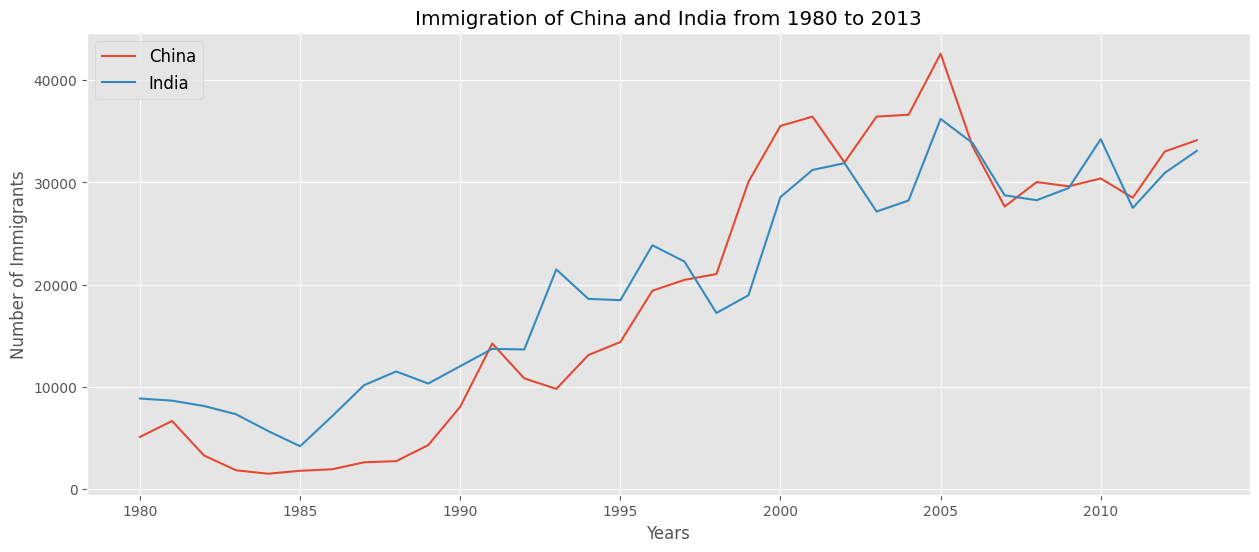

In [261]:
# membuat plot graph menjadi spesifik line plot dengan menambahkan parameter (kind='line')
df_q1.plot(kind='line', figsize=(15, 6))

# menambahkan judul, label sumbu x, label sumbu y
plt.title('Immigration of China and India from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

# menambahkan keterangan untuk garis terhadap negara yang diwakilinya
plt.legend(loc='upper left', fontsize='large')

# Menampilkan plot
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [262]:
# mengurutkan nilai pada kolom 'Total' dari nilai terbesar ke terkecil di dataframe
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# mengambil top 5 negara
df_q2 = df_can.head()

# menampilkan dataframe
df_q2.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [263]:
# mentranspose dataframe agar bentuk plotnya mendistribusi frekuensi imigran top 5 negara, bukan imigran selama bertahun-tahun.
df_q2 = df_q2[years].transpose()

# menampilkan dataframe
df_q2.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Step 2: Plot graph

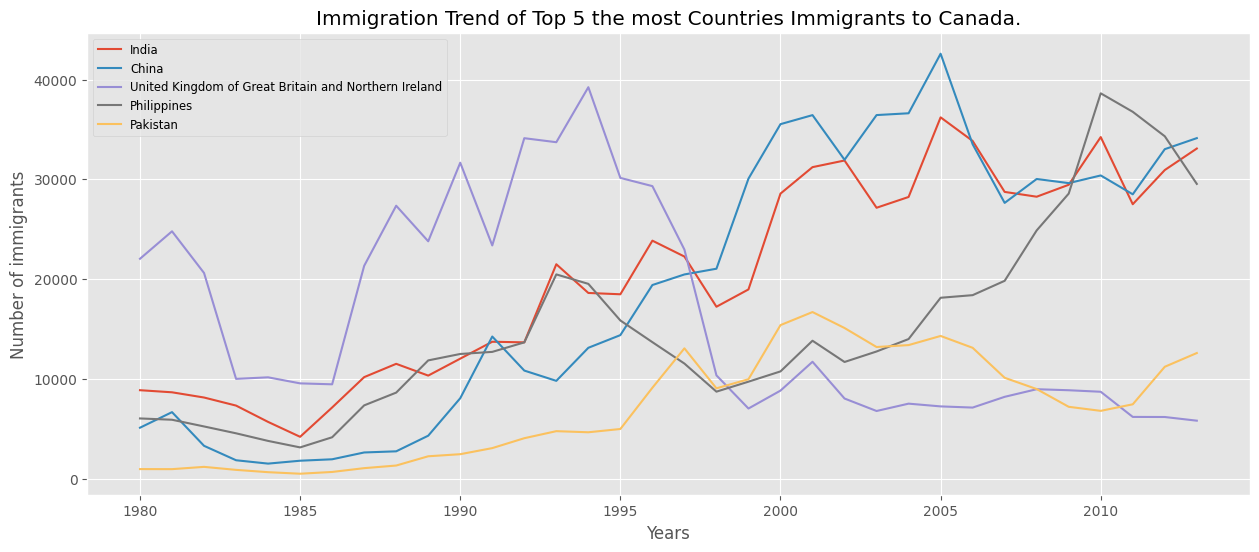

In [264]:
# membuat plot graph menjadi spesifik line plot dengan menambahkan parameter (kind='line') dan memberikan ukuran (15, 6)
df_q2.plot(kind='line', figsize=(15, 6))

# menambahkan judul, label sumbu x, label sumbu y
plt.title('Immigration Trend of Top 5 the most Countries Immigrants to Canada.')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')

# menambahkan keterangan untuk garis terhadap negara yang diwakilinya
plt.legend(loc='upper left', fontsize='small')

# menampilkan plot
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [265]:
# mengurutkan nilai pada kolom 'Total' dari nilai terkecil ke terbesar di dataframe
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

# mengambil top 5 negara
df_q3 = df_can.head()

# menampilkan dataframe
df_q3.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5


In [266]:
# mentranspose dataframe agar bentuk plotnya mendistribusi frekuensi imigran top 5 negara, bukan imigran selama bertahun-tahun.
df_q3 = df_q3[years].transpose()

# menampilkan dataframe
df_q3.head()

,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


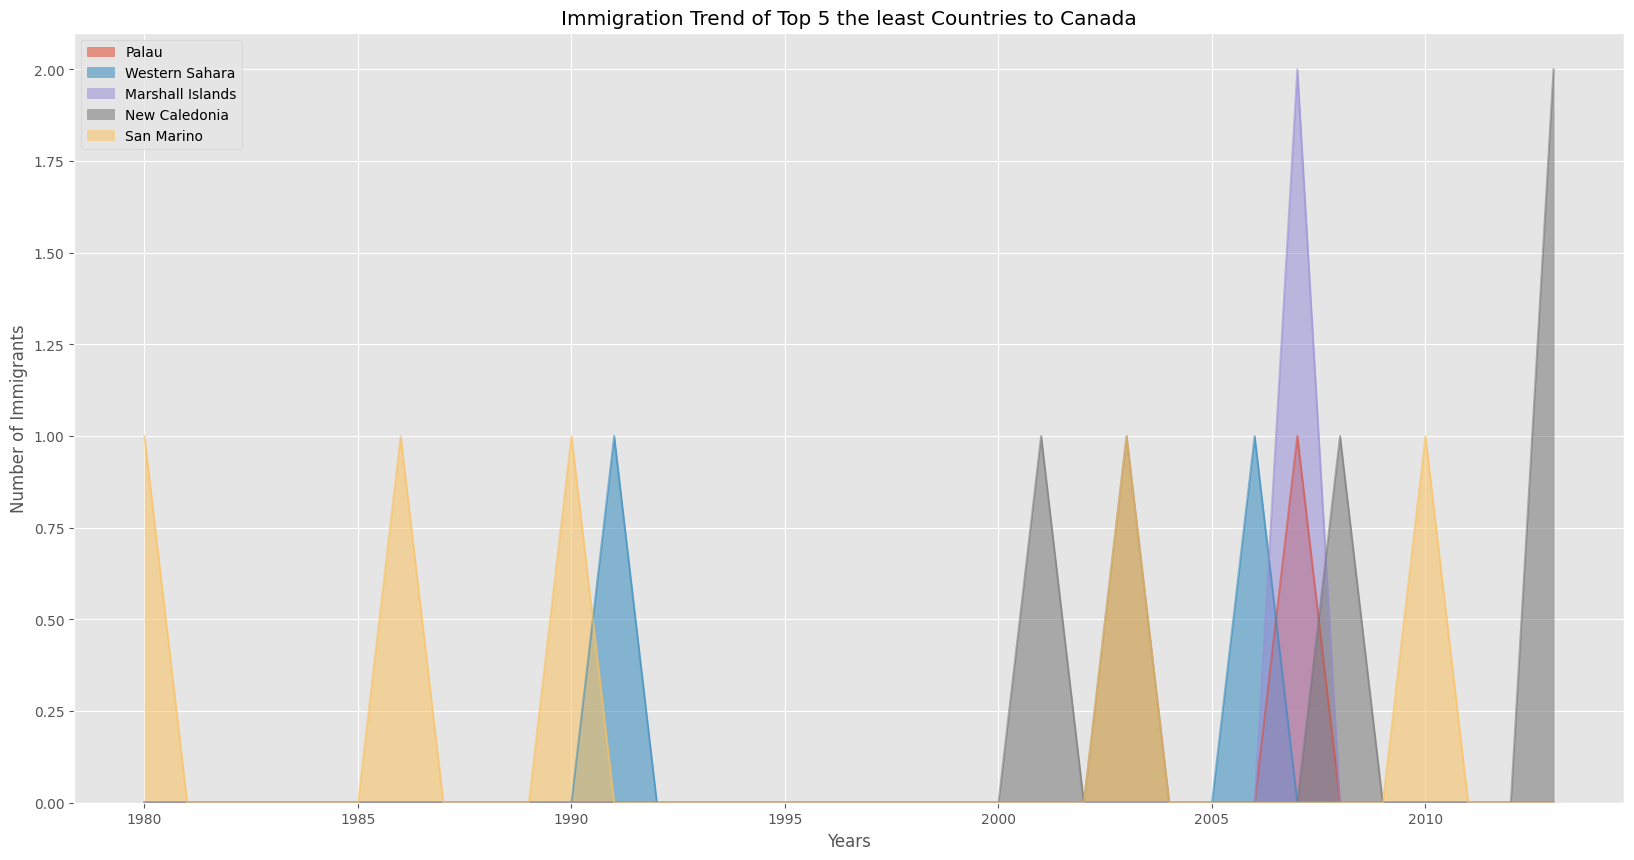

In [267]:
# mengubah nilai index df_q3 menjadi tipe integer untuk plot
df_q3.index = df_q3.index.map(int)

# membuat plot graph menjadi spesifik unstacked area plot (kind='area' & stacked=False) dengan transparency value of 0.55 (alpha=0.55)
df_q3.plot(kind='area',
             alpha=0.55,
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

# menambahkan judul, label sumbu x, label sumbu y
plt.title('Immigration Trend of Top 5 the least Countries to Canada')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

# menampilkan plot
plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [268]:
# mengambil data 'Greece', 'Albania',  dan 'Bulgaria' dari dataset dengan hanya menyertakan tahun 1980 - 2013
df_q4 = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# menampilkan dataframe
df_q4.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


In [269]:
# mentranspose dataframe agar bentuk plotnya mendistribusi frekuensi imigran di 3 negara, bukan imigran selama bertahun-tahun.
df_q4 = df_q4.transpose()

# menampilkan dataframe
df_q4.head()

,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


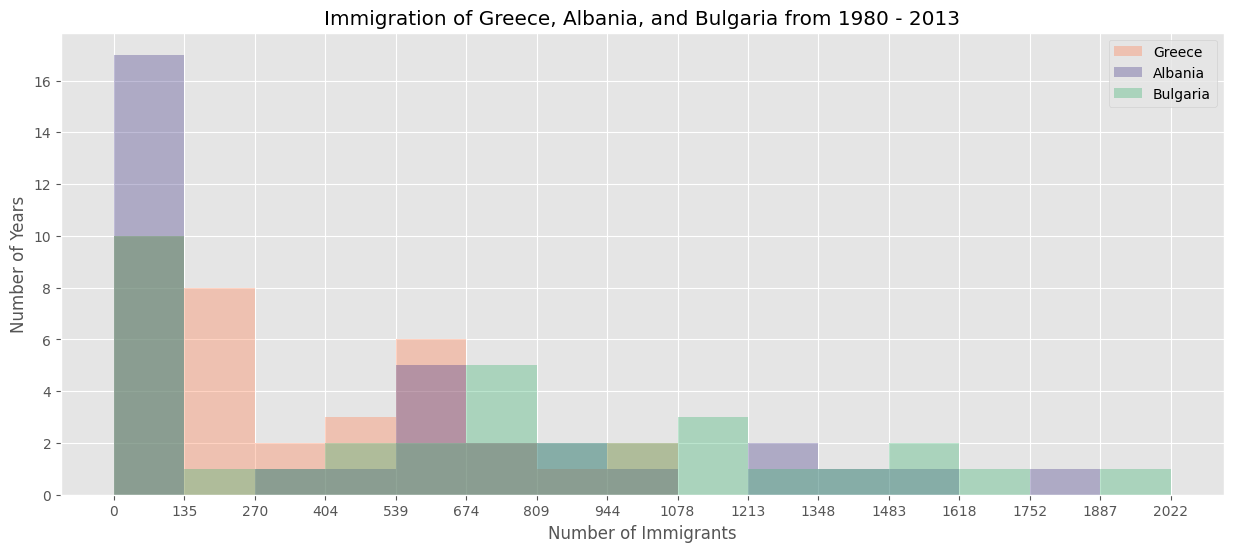

In [280]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_q4, 15)

# membuat plot graph menjadi spesifik overlapping plot with 15 bins (kind ='hist' & bins=15) and a transparency value of 0.35 (alpha=0.35)
df_q4.plot(kind ='hist',
          figsize=(15, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

# menambahkan judul, label sumbu x, label sumbu y
plt.title('Immigration of Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

# menampilkan plot
plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.



In [271]:
# mengurutkan nilai pada kolom 'Total' dari nilai terbesar ke terkecil di dataframe
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# mengambil top 15 negara
df_q5 = df_can.head(15)

# menmapilkan dataframe
df_q5.head(15)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241


Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

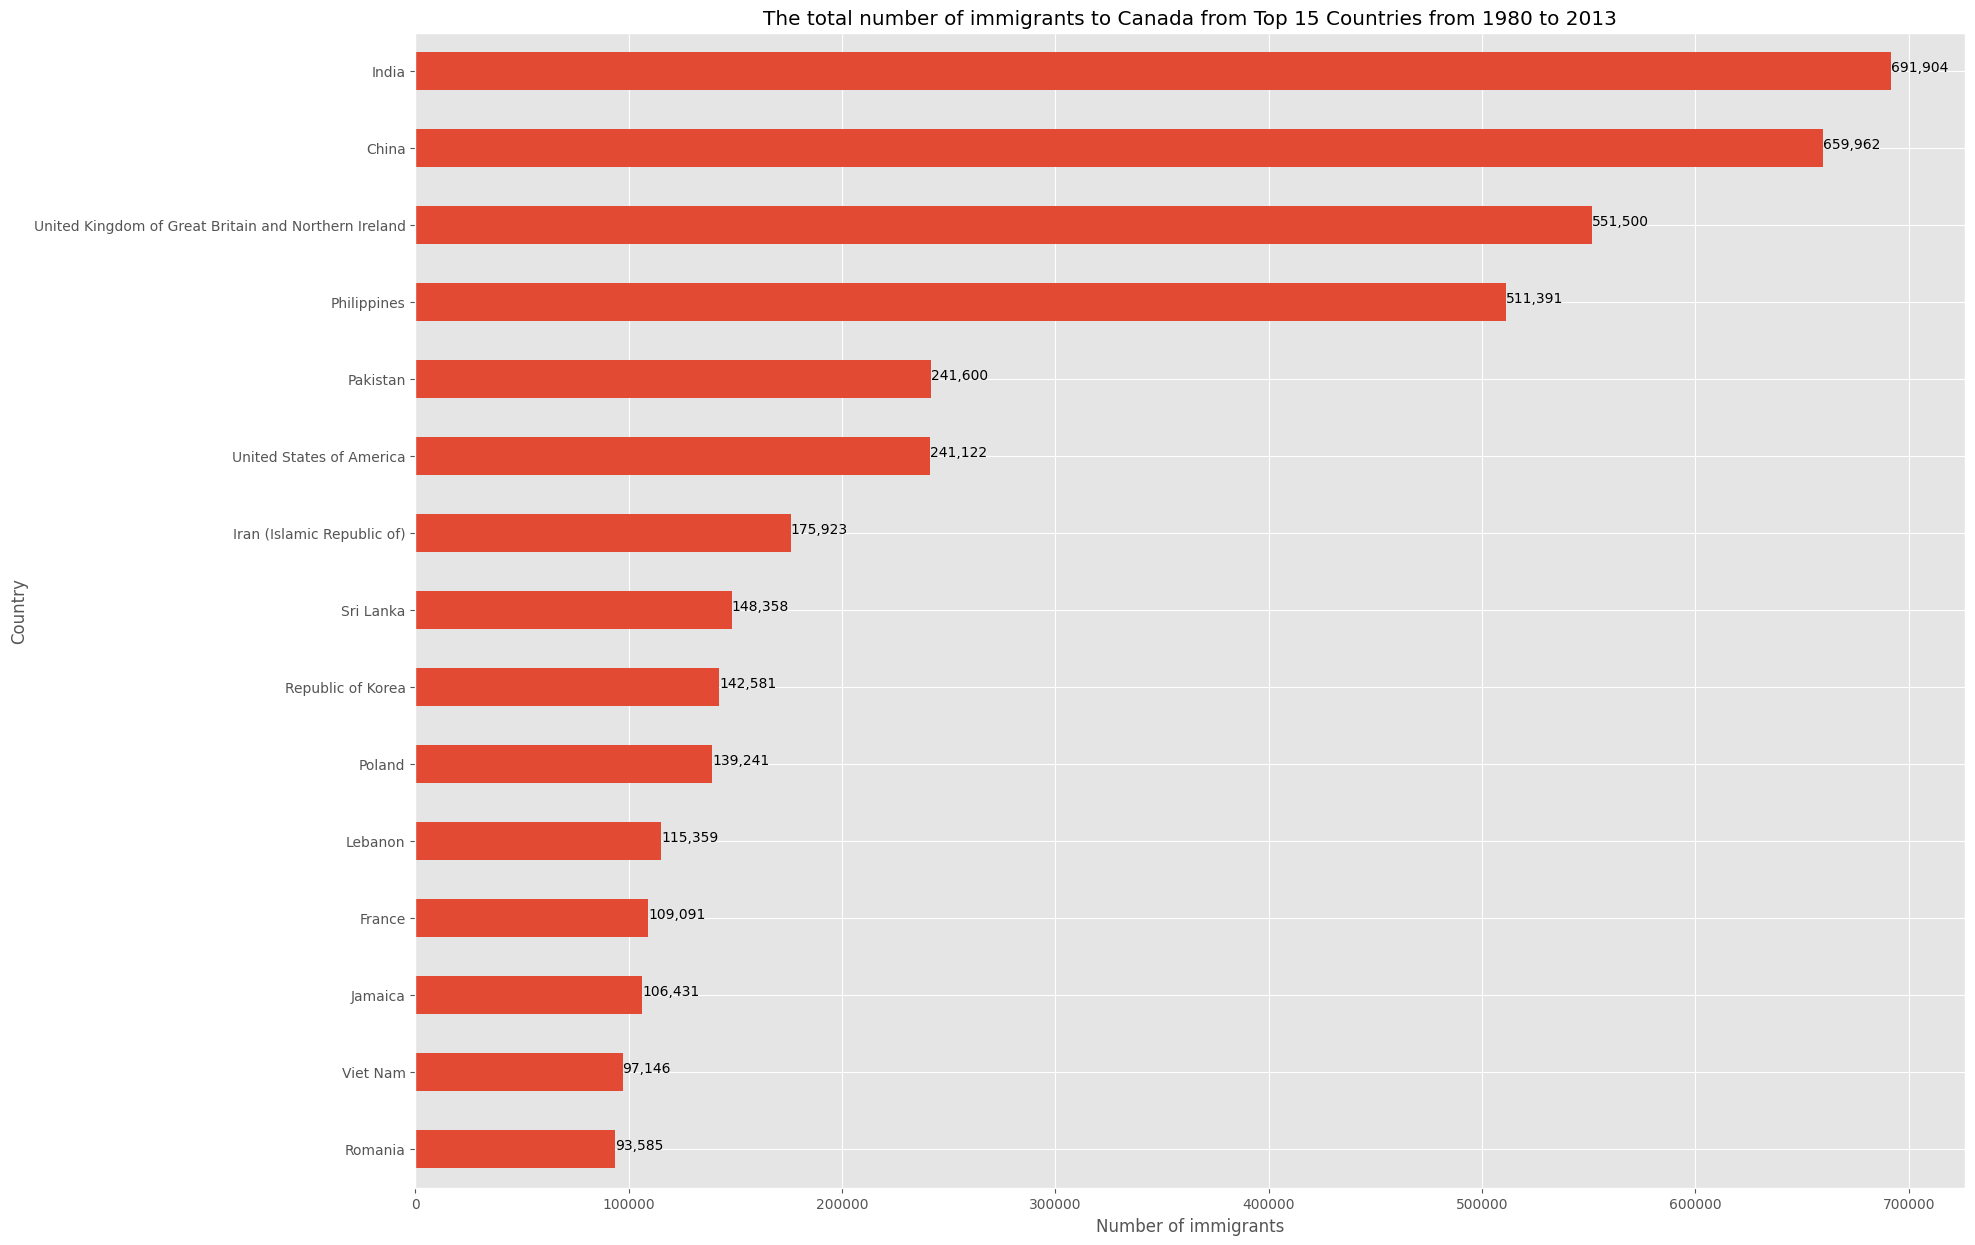

In [279]:
# membuat plot data menjadi spesifik bar chart with horizontal bars (kind='barh')
df_q5['Total'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 15))

# membuat label pada ujung tiap negara dengan jumlah total imigran
for index, value in enumerate(df_q5['Total'].sort_values(ascending=True)):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')

# menambahkan judul, label sumbu x, label sumbu y
plt.title('The total number of immigrants to Canada from Top 15 Countries from 1980 to 2013')
plt.xlabel('Number of immigrants')
plt.ylabel('Country')

# menampilkan plot
plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).